# Results Section: Fig of first look

Colors:<br>
https://matplotlib.org/examples/color/named_colors.html

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path

import sklearn
import numpy as np
import pandas as pd
from scipy.stats import iqr
from glob import glob

from sklearn import metrics
from math import sqrt

import matplotlib
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# Make all python scripts available in the path
sys.path.append('../')

import pp_utils
import lrn_crv_plot
%matplotlib inline

filepath = Path(os.getcwd())
print(filepath)

/vol/ml/apartin/projects/LearningCurves/notebooks


In [2]:
from fit import * # weighted_power_law, fit_weighted_pwr_law
import rpy2.robjects as robjects

In [3]:
save_fig_path = filepath/'figs/first_look'
os.makedirs(save_fig_path, exist_ok=True)

def save_fig(save_fig_path, fname):    
    # plt.savefig(save_fig_path/(fname + '.eps'), format='eps')
    plt.savefig(save_fig_path/(fname + '.png'), dpi=200)

In [4]:
def calc_gof(y, yfit):
    gof = {}
    rmse = sqrt( metrics.mean_squared_error(y, yfit) )
    mae = metrics.mean_absolute_error(y, yfit)
    gof['rmse'] = rmse
    gof['mae'] = mae
    return gof

### Get dir path of all runs

In [6]:
src = 'gdsc_on_none'
# src = 'top6_on_none'

# GDSC
if src=='gdsc_on_none':
    # base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/multi_seed_lgbm_100_trees')
    base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/multi_seed_rf_100_trees')
    # base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/fine_grain_lgb_subset')
    
# Top6    
elif src=='top6_on_none':
    base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/multi_seed_lgbm_100_trees')
    # base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/multi_seed_rf_100_trees')
    # base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0')
    
# Get all run dirs
runs = glob(str(base_dir/'*'))

### Aggregate results over runs

In [7]:
scores = []
# prf = 'id'
prf = 'run'

for i, r in enumerate(runs):
    # scr_tmp = pd.read_csv( Path(r)/'lrn_crv_scores.csv' )
    dpath = Path(r)/'lrn_crv_scores.csv'
    if not dpath.exists():
        continue
        
    scr_tmp = pd.read_csv( dpath )
    scr_tmp.rename(columns={'fold0': prf+str(i)}, inplace=True)
    if len(scores)==0:
        scores = scr_tmp
    else:
        scores = scores.merge(scr_tmp, on=['metric', 'tr_size', 'set'])
        
run_col_names = [c for c in scores.columns if prf in c]

scores_mean   = scores[run_col_names].mean(axis=1)
scores_median = scores[run_col_names].median(axis=1)
scores_std    = scores[run_col_names].std(axis=1)
# scores_iqr    = iqr(scores.iloc[:, 6:].values, axis=0)

scores.insert(loc=3, column='mean', value=scores_mean)
scores.insert(loc=3, column='median', value=scores_median)
scores.insert(loc=3, column='std', value=scores_std)
print(len(np.unique(scores.tr_size)))

# display(scores[:2])
print('Training set sizes:', np.unique(scores.tr_size))

# scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True).iloc[:, :6]
scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True)

save = True
if save:
    scores.to_csv(base_dir/'all_seed_runs_scores.csv', index=False)
    scores_te.to_csv(base_dir/'scores.csv', index=False)

17
Training set sizes: [    2     4     8    16    32    64   128   256   512  1024  2048  4096
  8192 16384 32768 65536 88416]


In [8]:
# figsize = (6, 4.5)
# metric_name = 'mean_absolute_error'
# tr_set = 'te'

# shift_idx=2

In [9]:
# ax = None

# # plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'linear', 'ytick_scale': 'linear'}
# plot_args = {'metric_name': metric_name, 'xtick_scale': 'log2', 'ytick_scale': 'linear', 'figsize': figsize}
# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x = scores_te['tr_size'], y = scores_te['id5'],
#         ax=ax, ls='--', marker='.', alpha=1,
#         **plot_args, label='Raw Data')

# LC on lin-lin scale
Generated using GBDT for multiple data shuffles of GDSC.

### TODO!
- Add more ticks
- Add data size as 1x10^3, 2x20^3. Or, 10, 20, 30, etc., but at the label (say in thousands)

In [10]:
figsize = (6, 4.5)
metric_name = 'mean_absolute_error'
tr_set = 'te'

# shift_idx=1
shift_idx=2
# shift_idx=3

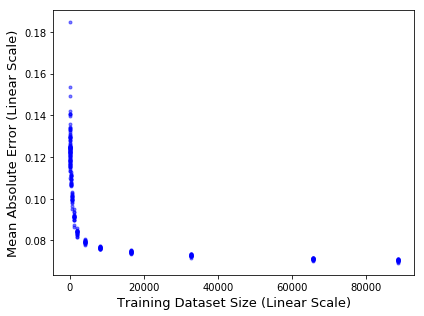

In [11]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'linear', 'ytick_scale': 'linear'}

ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shift_idx, **plot_args );
plt.tight_layout()
# ax.set_xlim([2**1, 2**17])
# ax.set_ylim([0.065, 0.165])
ax.grid(False)

# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = 'Testing'
# ax.set_xticklabels(labels)
# plt.show()

save_fig(save_fig_path, fname=f'{src}_all_runs_lin')

# LC on log-log scale
Generated using GBDT for multiple data shuffles of GDSC.

### TODO!
- https://stackoverflow.com/questions/14530113/set-ticks-with-logarithmic-scale
- https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html
- Add more ticks: 2^3, 2^4, 2^5, etc.

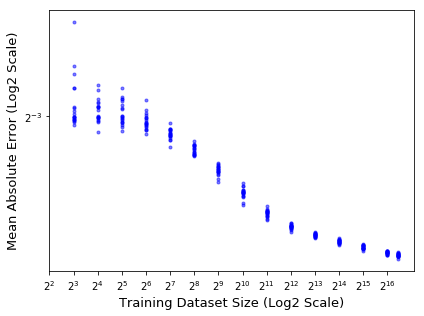

In [12]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'log2', 'ytick_scale': 'log2'}
# plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'log2', 'ytick_scale': 'linear'}

ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shift_idx, **plot_args );
plt.tight_layout()
# ax.set_xlim([2**2, 2**17])
# ax.set_ylim([2**-4, 2**-2])
# ax.set_ylim([0.065, 0.165])
ax.grid(False)

ax.set_xticks([2**i for i in range(2, 17)])
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# ax.get_xaxis().set_major_formatter(matplotlib.ticker.LogFormatter(2))
# ax.get_xaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())

locs, labels = plt.xticks()
# tmp = ax.get_xticklabels(); print(list(tmp))
# tmp = ax.get_xticks(); print(list(tmp))
# ax.set_xticklabels(labels, fontdict=None, minor=False)

save_fig(save_fig_path, fname=f'{src}_all_runs_log')

# LC Median and STD across shuffles

In [13]:
figsize = (6, 4.5)
# figsize = (10, 8)

plot_args = {'metric_name': metric_name, 'xtick_scale': 'log2', 'ytick_scale': 'log2', 'figsize': figsize}

In [14]:
# The previous two figures should help decide which shards to use
scr = scores_te[shift_idx:].reset_index(drop=True)
y_col_name = 'median'

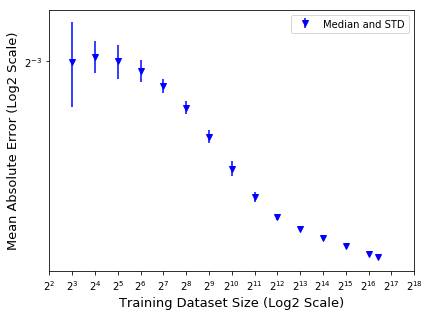

In [15]:
x = scr['tr_size']
y = scr[y_col_name]
yerr = scr['std']

shard_min_idx = 0
xf = x[shard_min_idx:]
yf = y[shard_min_idx:]

ax = None

ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, yerr=yerr,
                                   ax=ax, ls='', marker='v', alpha=1,
                                   **plot_args, color='b', label='Median and STD')

ax.legend(frameon=True, fontsize=10, loc='best');
plt.tight_layout()
# ax.set_xlim([2**2, 2**17])
# ax.set_ylim([2**-4, 2**-2])
# ax.set_xlim([2**2, 2**17])
# ax.set_ylim([0.055, 0.165])
# ax.set_ylim([0.065, 0.165])
ax.grid(False)
# ax.set_xticks([2**i for i in range(2, 17)]) # GDSC
ax.set_xticks([2**i for i in range(2, 19)]) # Top6
save_fig(save_fig_path, fname=f'{src}_avg_median_std')

# Power-law fit to all LC data

#### Un-weighted power-law

In [27]:
# x = scr['tr_size']
# y = scr[y_col_name]
# yerr = scr['std']

# shard_min_idx = 0
# xf = x[shard_min_idx:]
# yf = y[shard_min_idx:]

# ax = None

# ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, yerr=yerr,
#                                    ax=ax, ls='', marker='v', alpha=1,
#                                    **plot_args, label='Median and STD')

# shard_min_idx = 0

# ax, _, gof = lrn_crv_plot.plot_lrn_crv_power_law(x=xf, y=yf,
#                                                  **plot_args, plot_raw=False, ax=ax, alpha=1);

# ax.legend(frameon=True, fontsize=10, loc='best')
# plt.tight_layout()
# # ax.set_xlim([2**2, 2**17])
# # ax.set_ylim([0.055, 0.165])
# ax.set_ylim([0.060, 0.150])
# ax.grid(False)
# ax.set_xticks([2**i for i in range(2, 17)])

# save_fig(save_fig_path, fname=f'{src}_agg_median_std_fit_all')
# print('GOF:', gof)

#### Weighted power-law

firebrick
GOF: {'rmse': 0.022160100754967663, 'mae': 0.010644234512371332}


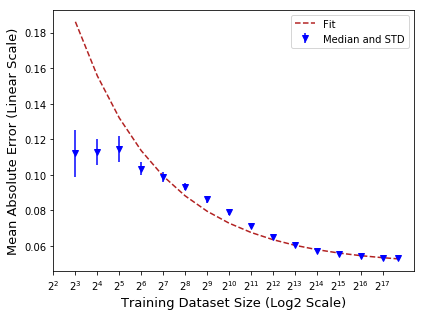

In [37]:
x = scr['tr_size']
y = scr[y_col_name]
yerr = scr['std']

shard_min_idx = 0
xf = x[shard_min_idx:]
yf = y[shard_min_idx:]
prms = fit_params(xf, yf)
yfit = biased_powerlaw(xf, **prms)

ax = None

ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, yerr=yerr,
                                   ax=ax, ls='', marker='v', alpha=1,
                                   **plot_args, color='b', label='Median and STD')

ax = lrn_crv_plot.plot_lrn_crv_new(x=xf, y=yfit,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, color='firebrick', label='Fit')

gof = calc_gof(yf, yfit)

ax.legend(frameon=True, fontsize=10, loc='best')
plt.tight_layout()
ax.grid(False)
# ax.set_xticks([2**i for i in range(2, 17)]) # GDSC
ax.set_xticks([2**i for i in range(2, 18)]) # Top6

save_fig(save_fig_path, fname=f'{src}_agg_median_std_fit_all')
print('GOF:', gof)

# Power-law fit to a subset LC data

#### Un-weighted power-law

In [47]:
# tot_pnts = len(scr['tr_size'])
# n_pnts_fit = 10 # Number of points to use for curve fitting starting from the largest size

# ax = None

# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x = scr['tr_size'], y = scr[y_col_name], yerr = scr['std'],
#         ax=ax, ls='', marker='v', alpha=1,
#         **plot_args, label='Median and STD')

# shard_min_idx = 0 if tot_pnts < n_pnts_fit else tot_pnts - n_pnts_fit

# ax, _, gof = lrn_crv_plot.plot_lrn_crv_power_law(
#         x = scr['tr_size'][shard_min_idx:], y = scr[y_col_name][shard_min_idx:],
#         **plot_args, plot_raw=False, ax=ax, alpha=1 );

# ax.legend(frameon=True, fontsize=10, loc='best')
# plt.tight_layout()
# # ax.set_xlim([2**2, 2**17])
# # ax.set_ylim([0.055, 0.165])
# ax.set_ylim([0.060, 0.150])
# ax.grid(False)

# save_fig(save_fig_path, fname=f'{src}_agg_median_std_fit_subset')
# print('GOF:', gof)

#### Weighted power-law

GOF: {'rmse': 0.0004446066747408091, 'mae': 0.00027204718996853296}


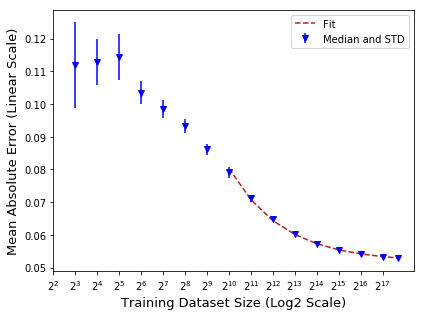

In [53]:
tot_pnts = len(x)
n_pnts_fit = 9 # Number of points to use for curve fitting starting from the largest size

x = scr['tr_size']
y = scr[y_col_name]
yerr = scr['std']

shard_min_idx = 0 if tot_pnts < n_pnts_fit else tot_pnts - n_pnts_fit

xf = x[shard_min_idx:]
yf = y[shard_min_idx:]
prms = fit_params(xf, yf)
yfit = biased_powerlaw(xf, **prms)

ax = None

ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, yerr=yerr,
                                   ax=ax, ls='', marker='v', alpha=1,
                                   **plot_args, color='b', label='Median and STD')

ax = lrn_crv_plot.plot_lrn_crv_new(x=xf, y=yfit,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, color='firebrick', label='Fit')

gof = calc_gof(yf, yfit)

ax.legend(frameon=True, fontsize=10, loc='best')
plt.tight_layout()
ax.grid(False)
# ax.set_xticks([2**i for i in range(2, 17)]) # GDSC
ax.set_xticks([2**i for i in range(2, 18)]) # Top6

save_fig(save_fig_path, fname=f'{src}_agg_median_std_fit_all')
print('GOF:', gof)

# MAE as a function of LC points

The workflow is to go backwards. We fit a power-law after every time we compute score for consecutive (smaller) shard. Stop when quality of fit decreases.

#### Un-weighted power-law

In [39]:
# tot_pnts = len(scr['tr_size'])
# print('tot_pnts', tot_pnts)
# # min_points = 3  # 3 points doesn't work
# min_pnts_fit = 4  # Min points to fit 
# # max_pnts_fit = 9  # Min points to fit
# max_pnts_fit = tot_pnts

# p_arr = []
# gof_arr = []
# prm_arr = []

# ax = None
# for n_pnts_fit in range(min_pnts_fit, max_pnts_fit+1):
#     shard_min_idx = tot_pnts - n_pnts_fit
    
#     ax, prm, gof = lrn_crv_plot.plot_lrn_crv_power_law(
#             x=scr['tr_size'][shard_min_idx:], y=scr['median'][shard_min_idx:],
#             **plot_args, ax=ax, plot_raw=False, label=str(n_pnts_fit) );
    
#     prm_arr.append(prm)
#     gof_arr.append(gof)
#     p_arr.append(n_pnts_fit)

In [40]:
# prm_df = pd.DataFrame(prm_arr)
# gof_df = pd.DataFrame(gof_arr)
# n_pnts_df = pd.DataFrame({'n_pnts': p_arr})
# dd = pd.concat([n_pnts_df, gof_df, prm_df], axis=1)

# display(dd.sort_values('mae'))

In [41]:
# plot_beta = False
# # plot_beta = True

# fig, ax1 = plt.subplots()

# # Plot metrics
# alpha = 0.6
# linewidth = 1
# fontsize = 12
# lns1 = ax1.plot(dd.n_pnts, dd.mae, marker='o', ls='', label='Fit MAE');
# ax1.set_xlabel('Number of Curve Fitting Points', fontsize=fontsize)
# # ax1.set_xlabel('Number of points used to fit power-law model', fontsize=fontsize)
# ax1.set_ylabel('Fit MAE', fontsize=fontsize)
# ax1.tick_params('y', colors='k')

# leg = lns1

# if plot_beta:
#     ax2 = ax1.twinx()
#     lns2 = ax2.plot(dd.n_pnts, dd.beta, color='m', marker='*', ls='', label='Fit Parameter $b$')
#     ax2.set_ylabel('Fit Parameter $b$ in $am^{b} + c$', color='k', fontsize=fontsize)
#     ax2.tick_params('y', colors='k')
#     leg.append(lns2)
#     leg = lns1 + lns2
        
# ax1.grid(True)

# labs = [l.get_label() for l in leg]
# legend = ax1.legend(leg, labs, loc=0)
# frame = legend.get_frame()
# frame.set_facecolor('0.95')

# # ax.set_ylim([0.060, 0.150])
# ax1.grid(False)
# plt.tight_layout()

# save_fig(save_fig_path, fname=f'{src}_mae_prm_b_num_points')

#### Weighted power-law

tot_pnts 16


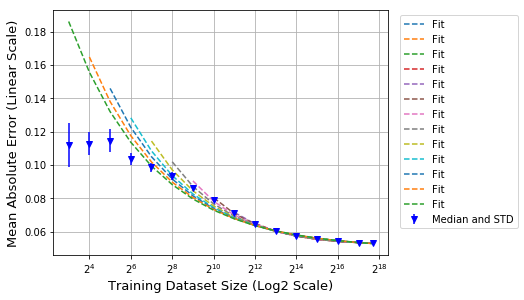

In [45]:
x = scr['tr_size']
y = scr[y_col_name]
yerr = scr['std']

tot_pnts = len(x)
print('tot_pnts', tot_pnts)
# min_points = 3  # 3 points doesn't work
min_pnts_fit = 4  # Min points to fit 
# max_pnts_fit = 9  # Min points to fit
max_pnts_fit = tot_pnts

p_arr = []
gof_arr = []
prm_arr = []

ax = None
ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, yerr=yerr,
                                   ax=ax, ls='', marker='v', alpha=1,
                                   **plot_args, color='b', label='Median and STD');

for n_pnts_fit in range(min_pnts_fit, max_pnts_fit+1):
    shard_min_idx = tot_pnts - n_pnts_fit
    
    xf = x[shard_min_idx:]
    yf = y[shard_min_idx:]
    prms = fit_params(xf, yf)
    yfit = biased_powerlaw(xf, **prms)
    
    gof = calc_gof(yf, yfit)
    
    ax = lrn_crv_plot.plot_lrn_crv_new(x=xf, y=yfit,
                                       ax=ax, ls='--', marker='', alpha=1,
                                       **plot_args, label='Fit');
    
    prm_arr.append(prms)
    gof_arr.append(gof)
    p_arr.append(n_pnts_fit)

In [46]:
prm_df = pd.DataFrame(prm_arr)
gof_df = pd.DataFrame(gof_arr)
n_pnts_df = pd.DataFrame({'n_pnts': p_arr})
dd = pd.concat([n_pnts_df, gof_df, prm_df], axis=1)

display(dd.sort_values('mae'))

,n_pnts,mae,rmse,alpha,beta,gamma
0,4,0.000014,0.000015,4.690974,-0.698988,0.052097
1,5,0.000020,0.000024,2.941437,-0.651752,0.051987
2,6,0.000020,0.000024,3.115968,-0.657798,0.052004
3,7,0.000038,0.000050,2.694300,-0.642027,0.051952
4,8,0.000093,0.000140,2.218749,-0.620199,0.051865
5,9,0.000272,0.000445,1.695168,-0.588852,0.051713
6,10,0.000793,0.001451,1.137859,-0.540846,0.051421
7,11,0.001445,0.002776,0.799381,-0.497002,0.051083
8,12,0.002490,0.004895,0.583845,-0.456888,0.050696
9,13,0.003752,0.007617,0.454879,-0.424208,0.050313


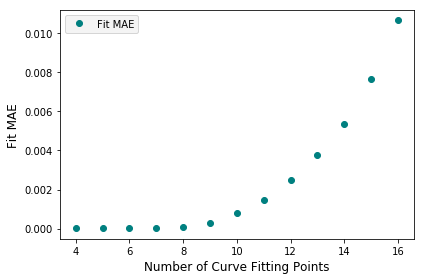

In [48]:
plot_beta = False
# plot_beta = True

fig, ax1 = plt.subplots()

# Plot metrics
alpha = 0.6
linewidth = 1
fontsize = 12
lns1 = ax1.plot(dd.n_pnts, dd.mae, marker='o', ls='', color='teal', label='Fit MAE');
ax1.set_xlabel('Number of Curve Fitting Points', fontsize=fontsize)
# ax1.set_xlabel('Number of points used to fit power-law model', fontsize=fontsize)
ax1.set_ylabel('Fit MAE', fontsize=fontsize)
ax1.tick_params('y', colors='k')

leg = lns1

if plot_beta:
    ax2 = ax1.twinx()
    lns2 = ax2.plot(dd.n_pnts, dd.beta, color='m', marker='*', ls='', label='Fit Parameter $b$')
    ax2.set_ylabel('Fit Parameter $b$ in $am^{b} + c$', color='k', fontsize=fontsize)
    ax2.tick_params('y', colors='k')
    leg.append(lns2)
    leg = lns1 + lns2
        
ax1.grid(True)

labs = [l.get_label() for l in leg]
legend = ax1.legend(leg, labs, loc=0)
frame = legend.get_frame()
frame.set_facecolor('0.95')

# ax.set_ylim([0.060, 0.150])
ax1.grid(False)
plt.tight_layout()

save_fig(save_fig_path, fname=f'{src}_mae_prm_b_num_points')